In [1]:
import numpy

import scipy.special

In [2]:
class NN:
    def __init__(self, input_nodes = 784, hidden_nodes = 200, output_nodes = 10):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        
        self.weights_in = numpy.random.uniform(-1, 1, (self.hidden_nodes, self.input_nodes))

        self.weights_out = numpy.random.uniform(-1, 1, (self.output_nodes, self.hidden_nodes))
        self.learning_rate = 0.3
        
    def train(self,inputs, outputs):
        
        inputs = numpy.array(inputs, ndmin=2).T
        outputs = numpy.array(outputs, ndmin=2).T

        hidden_input = numpy.dot(self.weights_in,inputs)
        hidden_output = scipy.special.expit(hidden_input)

        final_layer_in = numpy.dot(self.weights_out, hidden_output)
        final_layer_out = scipy.special.expit(final_layer_in)

        errors = outputs - final_layer_out

        # .T because its the formula
        hidden_err = numpy.dot(self.weights_out.T, errors)

        self.weights_in += self.learning_rate * numpy.dot((hidden_err * hidden_output * (1- hidden_output)), inputs.T)

        self.weights_out += self.learning_rate * numpy.dot((errors * final_layer_out * (1- final_layer_out)), hidden_output.T)
        
    def query(self,inputs):
        hidden_input = numpy.dot(self.weights_in,inputs)
        hidden_output = scipy.special.expit(hidden_input)

        final_layer_in = numpy.dot(self.weights_out, hidden_output)
        final_layer_out = scipy.special.expit(final_layer_in)
        
        return final_layer_out

        
        
    

    

In [3]:
training_data_file = open("mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [4]:
# epochs is the number of times the training data set is used for training
epochs = 25
n = NN()
for e in range(epochs):
    for data in training_data_list:
        current_data = data.split(',')

        raw_data = (numpy.asfarray(current_data[1:]) / 255.0 * 0.99) + 0.1
        hand_digit = int(current_data[0])

        output = numpy.ndarray(10)
        output.fill(0.1)
        output[hand_digit] = 0.99

        n.train(raw_data, output)

In [5]:
test_data_file = open("mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()



In [6]:
final_result = []

for data in test_data_list:
    current_data = data.split(',')

    raw_data = (numpy.asfarray(current_data[1:]) / 255.0 * 0.99) + 0.1
    hand_digit = int(current_data[0])
    
    outputs = n.query(raw_data)
    
    calc_result = numpy.argmax(outputs)
    
    if calc_result == hand_digit:
        final_result.append(1)
    else:
        final_result.append(0)
        
        
performance = final_result.count(1) / len(final_result)
    
print("Performance = " , performance    * 100, "%")

Performance =  92.84 %


In [9]:
import scipy.misc
import matplotlib

%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\st\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


The predicted image is:  1


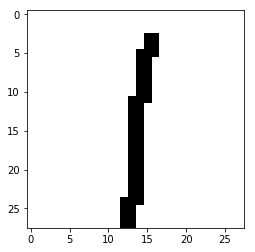

In [10]:
image = scipy.misc.imread("1.png", flatten=True)

# reshape from 28x28 to list of 784 values, invert values
image_data  = 255.0 - image.reshape(784)


# Scale data
image_data = (image_data / 255.0 * 0.99) + 0.01

outputs = n.query(image_data)

calc_result = numpy.argmax(outputs)


matplotlib.pyplot.imshow(image_data.reshape(28,28), cmap='Greys', interpolation='None')

print("The predicted image is: ", calc_result)

    

The predicted image is:  2


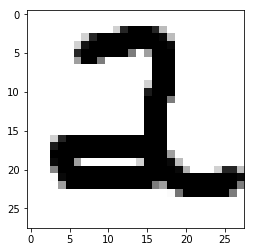

In [11]:
img_array = scipy.misc.imread("2.png", flatten=True)

# reshape from 28x28 to list of 784 values, invert values
img_data  = 255.0 - img_array.reshape(784)


# then scale data to range from 0.01 to 1.0
img_data = (img_data / 255.0 * 0.99) + 0.01

outputs = n.query(img_data)

calc_result = numpy.argmax(outputs)


matplotlib.pyplot.imshow(img_data.reshape(28,28), cmap='Greys', interpolation='None')

print("The predicted image is: ", calc_result)

The predicted image is:  3


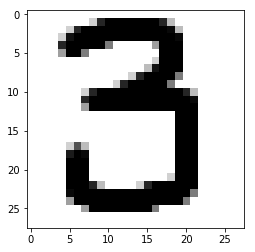

In [12]:
img_array = scipy.misc.imread("3.png", flatten=True)

# reshape from 28x28 to list of 784 values, invert values
img_data  = 255.0 - img_array.reshape(784)


# then scale data to range from 0.01 to 1.0
img_data = (img_data / 255.0 * 0.99) + 0.01

outputs = n.query(img_data)

calc_result = numpy.argmax(outputs)


matplotlib.pyplot.imshow(img_data.reshape(28,28), cmap='Greys', interpolation='None')

print("The predicted image is: ", calc_result)